## Homework 3 - CS348 Spring 2019

**Description** - This assignment is intended to teach you about linear models and naive bayes using python.

**Getting Started** - You should complete the assignment using your own installation of Python 3 and the packages numpy, pandas, matplotlib, and seaborn. Download the assignment from Moodle and unzip the file. This will create a directory with this file, 'HW03.ipynb', and a 'data' directory. The data files for each data set are in the 'data' directory.

**Deliverables** - The assignment has a single deliverable: this jupyter notebook file saved as a pdf. Please answer all coding and writing questions in the body of this file. Once all of the answers are complete, download the file by navigating the following menus: File -> Download as -> PDF via LaTeX. Submit the downloaded pdf file on gradescope. Alternatively, you can save the file as a pdf via the following: File -> Print Preview -> Print as pdf.

Note: You will be writing the written responses in the same cell block as the coding solution, so make sure to comment out the written responses.

**Data Sets** - In this assignment, you will run and analyze linear regression on a single synthetic dataset

**Academic Honesty Statement** — Copying solutions from external sources (books,
web pages, etc.) or other students is considered cheating. Sharing your solutions with
other students is considered cheating. Posting your code to public repositories such as
GitHub is also considered cheating. Any detected cheating will result in a grade of 0 on
the assignment for all students involved, and potentially a grade of F in the course.

This academic honesty statement does not restrict you from reading official documentation or using other web resources for understanding the syntax of python, related data science libraries, or properties of distributions.

In [1]:
# Do not import any other libraries other than those listed here. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Problem 1 - Regression

In this problem you'll construct a linear model to analyze a synthetic dataset.

In [2]:
# Load the data
x_train = np.loadtxt('data/x_train.csv', delimiter=',')
x_val = np.loadtxt('data/x_val.csv', delimiter=',')
y_train = np.loadtxt('data/y_train.csv', delimiter=',')
y_val = np.loadtxt('data/y_val.csv', delimiter=',')

**Part 1** (16 points)  
Using sci-kit learn's `LinearRegression` class, fit a linear regression model between features `x_train` and targets `y_train`. Using this model, produce a new array `y_train_res` which contains the residuals of the learned linear model corresponding to each row in the training dataset.

In [56]:
# Part 1 Solution

# --- write code here ---
linr = LinearRegression()
linr = linr.fit(x_train,y_train)
#residuals of learned linear model for each row in training data
y_train_res = np.abs(y_train - linr.predict(x_train))
#print(y_train_res)

**Part 2** (16 points)  
Without using `LinearRegression`'s `score()` method or `sklearn.metrics.r2_score`, compute the R-squared value for the trained model. Does this result imply that the linear regression assumptions are satisfied? Why or why not? Would your answer change if the R-squared were larger?

In [51]:
# Part 2 Solution

# --- write code here ---
#calculate residual sum of squares
foo = (y_train - linr.predict(x_train))**2
bar = np.sum(foo)
#calculate total sum of squares
oof=(y_train - np.mean(y_train))**2
rab = np.sum(oof)
#calculate R squared value 1-(RSS/Tss)
score = (1-(bar/rab))
print("R squared value = ",end='')
print(score)
#actual score using library methods - DELETE THIS BEFORE SUBMITTING
#print(linr.score(x_train,y_train))

# --- written response here ---
# Since we have an R squared value which is not negative, and greater than 0, we can say that the assumptions of the linear 
#regression model are satisfied. Particularly, the assumption that the response is a linear combination of the parameters 
# (the coefficients B1,B2) and predictor values x1,x2.
# If the value of R-squared were larger then it would be even more compelling evidence of the data's linear behavior. 
#However, just because our R-squared is not particularly close to 1 yet does not mean the assumptions we made are wrong, just 
#that we might find a better fit if we transform the predictor variables. 

R squared value = 0.6612116191209515


Based on their knowledge of the data generating process, your colleague suggests that a multiple linear regression may be an inappropriate method for analyzing this data. They instead suggest the conditional model `y = B_1 * x_1 + B_2 * f(x_2) + error`, where `y` is the outcome, `B_1` and `B_2` are parameters of the DGP, `x_1` and `x_2` are the first and second column of the dataset, `f()` is some non-linear function, and `error` is some random variable with 0 mean and constant variance.

**Part 3** (10 points)  
Make a residual plot with x_2 on the horizontal axis. Using this residual plot, describe any supporting evidence for your colleague's assumptions about the DGP.

Note: Recall the python/pandas is 0-indexed. Therefore, x_2 corresponds to `x_train[:, 1]`.

Text(0, 0.5, 'RSS')

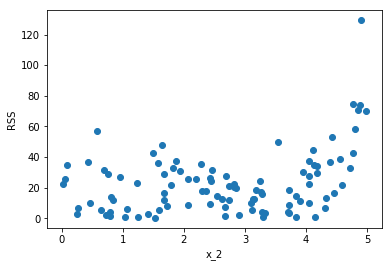

In [37]:
# Part 3 Solution

# --- write code here ---
plt.scatter(x_train[:,1],y_train_res)
plt.xlabel("x_2")
plt.ylabel('RSS')
# --- written response here ---
# Since x_2 and the residuals do not form a very smooth curve we want to transform x_2 with some function so that it corresponds
# to the results better. 

**Part 4** (30 points)  
Using your analysis in parts 1-3 as a guide, determine which of the following functions best represent `f()` in your colleague's conditional model.

`f(x) = ln(x)`  
`f(x) = exp(x)`  
`f(x) = x**2`  
`f(x) = x**0.5`  

In your code solution, you should show the R-squared value on your training data for a simple linear regression after using each of these non-linear transformations, as well as the residual plot for the one function you have selected. Using these sources of evidence, explain why you made your selection between the 4 transformations.

R squared value of ln(x)= 0.3481836559230782
R squared value of exp(x)= 0.9020636230233146
R squared value of x^2= 0.8078331499104046
R squared value of x^0.5= 0.5345538793827771


Text(0, 0.5, 'y_train2_rss')

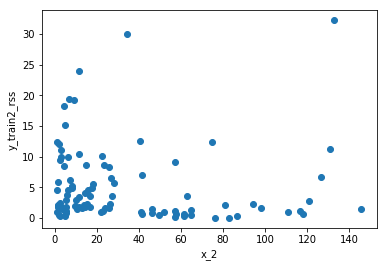

In [53]:
# Part 4 Solution

# --- write code here ---
# y = B_1 * x_1 + B_2 * f(x_2) + error
regr=LinearRegression()

def fitandscore(x):
    fit=regr.fit(x,y_train)
    score=fit.score(x,y_train)
    return(score)

lnx2= np.copy(x_train)
lnx2[:,1] = np.log(lnx2[:,1])
lnscore=fitandscore(lnx2)
print("R squared value of ln(x)= {}".format(lnscore))


expx2= np.copy(x_train)
expx2[:,1] = (np.exp(expx2[:,1]))
expscore=fitandscore(expx2)
print("R squared value of exp(x)= {}".format(expscore))


squaredx2= np.copy(x_train)
squaredx2[:,1] = (squaredx2[:,1]**2)
sqscore = fitandscore(squaredx2)
print("R squared value of x^2= {}".format(sqscore))

rootx2=np.copy(x_train)
rootx2[:,1] = (rootx2[:,1]**0.5)
rootscore=fitandscore(rootx2)
print("R squared value of x^0.5= {}".format(rootscore))


#residual plot for selected (highest r2 value)
#f()=exp(x) has highest R-squared value of 0.9
lr_exp = LinearRegression()
lr_exp = lr_exp.fit(expx2,y_train)
y_train_res2 = np.abs(y_train - lr_exp.predict(expx2))
plt.scatter(expx2[:,1],y_train_res2)
plt.xlabel("x_2")
plt.ylabel('y_train2_rss')

# --- written response here ---
# Because the exponential transformation had the highest R-squared value I chose to use it for the new model. 
# 

**Part 5** (10 points)  
Evaluate the R-squared values on `x_val` and `y_val` for both the original linear model in part 1 and the selected model in part 4. Describe how and why these results differ from the evaluation results in part 1 and part 4. 

Note: Make sure that whatever transformation you apply to the training data in part 4 is also applied to the validation data before evaluating the linear regression model. These models should be trained using only the training data, and then evaluated using only the validation data.

In [54]:
# Part 5 Solution

# --- write code here ---
#original model:
lr1 = LinearRegression()
lr1 = lr1.fit(x_val,y_val)
print(lr1.score(x_val,y_val))

#fit using training values (new exp model)
lr4 = LinearRegression()
lr4 = lr4.fit(expx2,y_train) #train using training data
#score using validation data
exp_x_val=np.copy(x_val)
exp_x_val[:,1]= np.exp(exp_x_val[:,1])
print(lr4.score(exp_x_val,y_val))
# --- written response here ---
# These results differ from those we got in part 1 and 4 because we are testing our model on different data than what we
# trained it with. 
# The precise differences for the original model are R-squared=0.66 on training and =0.59 on validation data
# For the exponential model: R-squared=0.9 on training and =0.83 on validation (test) data. 

0.5911214689958622
0.8323371024157278


**Part 6** (18 points)
Make a new residual plot using `x_1` (i.e. `x_train[:, 0]`) with your selected model from part 4. What does this imply about the assumptions in our regression model? Write and describe the equation for a conditional model similar to your colleagues that adjusts for this new finding.

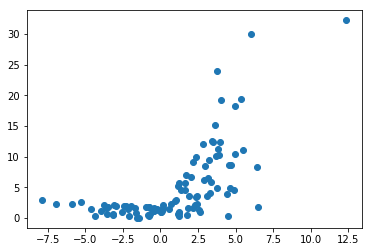

In [55]:
# Part 6 Solution

# --- write code here ---
exp_res = np.abs(y_train - lr4.predict(expx2))
plt.scatter(x_train[:,0],exp_res)


# --- written response here ---
# The plot shows that x_1 and the residual errors are not ideal because even though we transformed x_2 to improve the model, 
# we may also need to transform x_1 using a non-linear function as well since the plot is non-linear.
# A new equation we could try would involve transforming x_1 as well as x_2:
# y = B_1 * g(x_1) + B_2 * f(x_2) + error
# where y is the outcome, B_1 and B_2 are parameters of the DGP, x_1 and x_2 are the first and second column of the dataset,
#f() is some non-linear function,
#g() is also some non-linear function, 
#and error is some random variable with 0 mean and constant variance.